In [1]:
import numpy as np
import pandas as pd
import folium as fo
import geopy 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\91934\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\91934\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\91934\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
data=pd.read_csv("AB_NYC_2019.csv")

In [9]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
met=data["name"].mode()
data["name"].fillna(met.iloc[0],inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [12]:
data=data.drop(columns=["id","host_name","last_review"])

In [13]:
data.isnull().any()

name                              False
host_id                           False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [15]:

data["reviews_per_month"].fillna(value=data["reviews_per_month"].mean(),inplace=True)


C:\Users\91934\AppData\Local\Temp/ipykernel_8328/3702525853.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["reviews_per_month"].fillna(value=data["reviews_per_month"].mean(),inplace=True)


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [17]:
data=data.dropna()

In [18]:
data.isnull().any().any()

False

In [19]:
data["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [20]:
data["neighbourhood"].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [21]:
data["room_type"].unique()


array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [22]:
data.isnull().any()

name                              False
host_id                           False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [65]:
net=data["host_id"].value_counts()
net[:10]

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

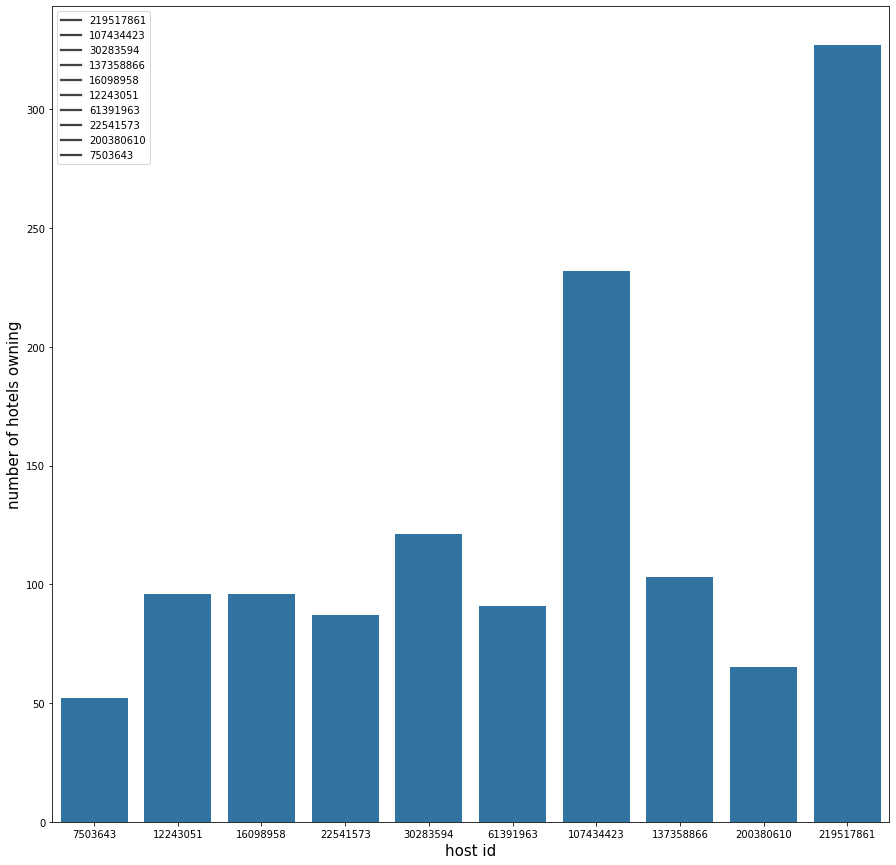

In [48]:
plt.figure(figsize=(15,15))

sns.barplot(x=net.index[:10],y=net.values[:10])
plt.xlabel("host id",size=15)
plt.ylabel("number of hotels owning",size=15)
plt.legend(["219517861", "107434423",  "30283594", "137358866",  "16098958",  "12243051",
        "61391963",  "22541573", "200380610",   "7503643"])
plt.show()

we can see 219517861 has more 300+ listings or owned

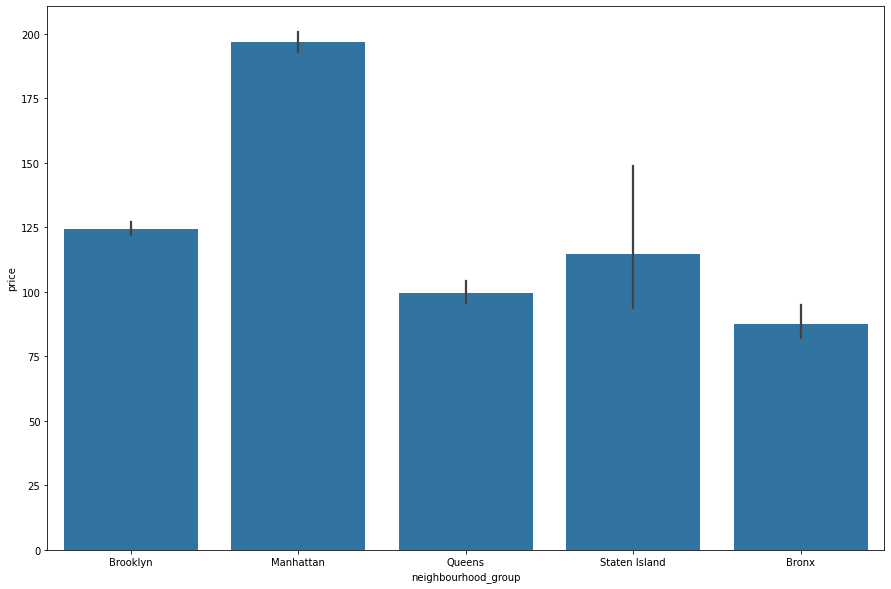

In [25]:
plt.figure(figsize=(15,10))
sns.barplot(data=data,x=data["neighbourhood_group"],y=data["price"])
plt.show()

## we can say price of manhattan neighbour hood is more costy


C:\Users\91934\AppData\Local\Temp/ipykernel_8328/1831616925.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=data["neighbourhood_group"],y=data["price"],palette=colour)


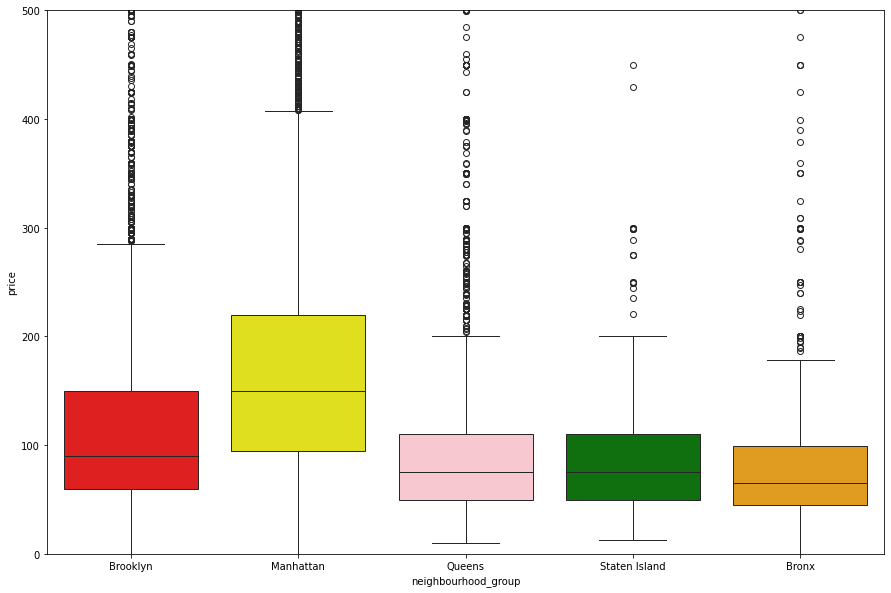

In [106]:
plt.figure(figsize=(15,10))
colour={'Brooklyn': 'red', 'Manhattan': 'yellow', 'Queens': 'pink', 'Staten Island': 'green',"Bronx":"orange"}
sns.boxplot(data=data,x=data["neighbourhood_group"],y=data["price"],palette=colour)
plt.ylim(0,500)
plt.show()

In [27]:
cot=data["price"].value_counts()
cot.loc[10000]

3

C:\Users\91934\AppData\Local\Temp/ipykernel_8328/1319797382.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data[df],x="neighbourhood_group",y="price",palette=colour)


[]

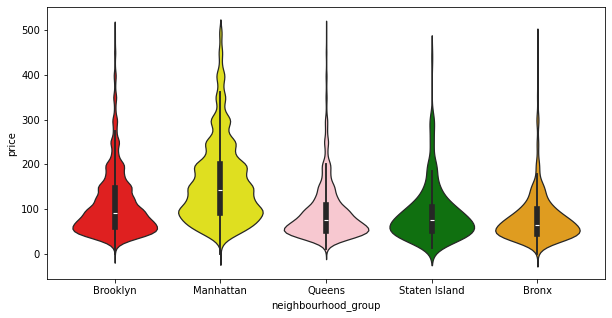

In [105]:
plt.figure(figsize=(10,5))
df=data["price"]<500
colour={'Brooklyn': 'red', 'Manhattan': 'yellow', 'Queens': 'pink', 'Staten Island': 'green',"Bronx":"orange"}
sns.violinplot(data=data[df],x="neighbourhood_group",y="price",palette=colour)
plt.plot()

In [29]:
one=data["neighbourhood_group"]=="Manhattan"
data[one]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.590000,1,129
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.470000,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48886,Comfy 1 Bedroom in Midtown East,274311461,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,1.373221,1,176
48888,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,1.373221,1,31
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1.373221,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,1.373221,6,2


[]

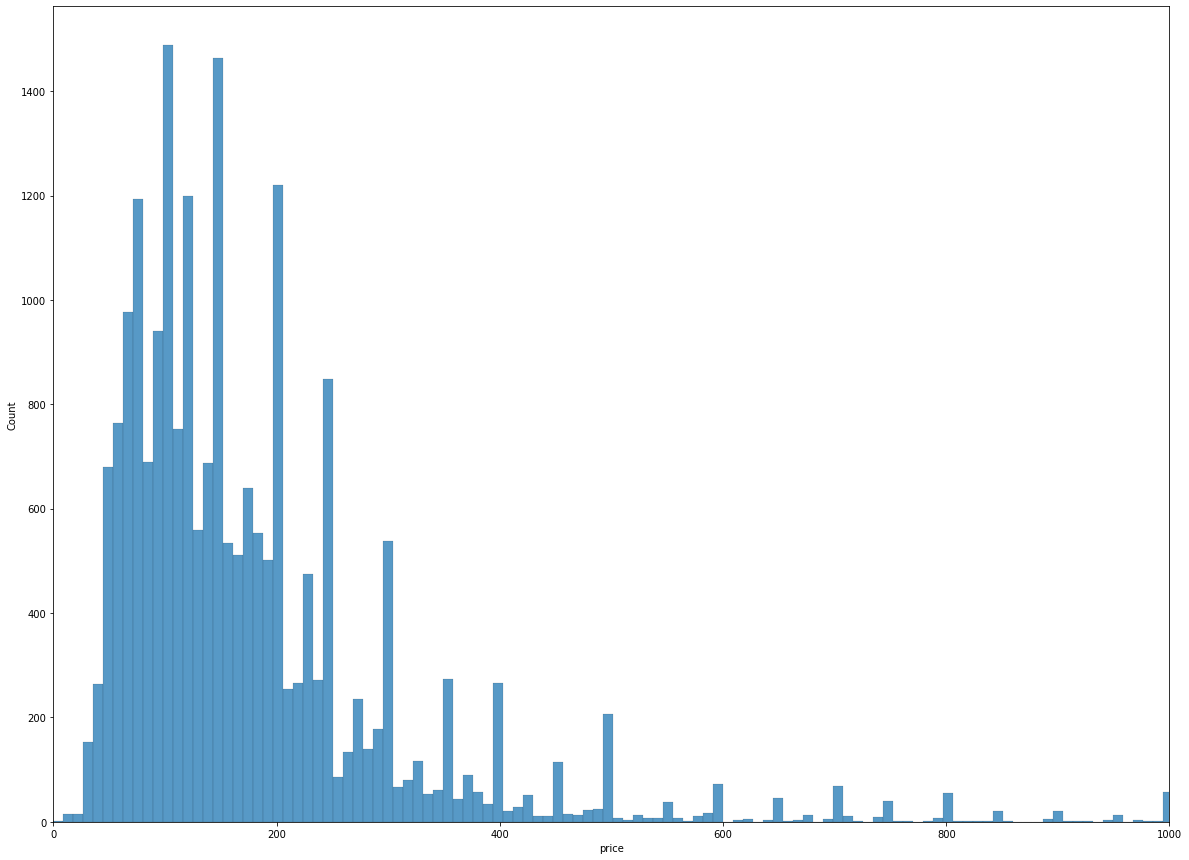

In [32]:
plt.figure(figsize=(20,15))
sns.histplot(data=data[one],x="price")
plt.xlim(0,1000)
plt.plot()

In [33]:

Q1=data.groupby("neighbourhood_group")[["price"]].quantile(0.25)
Q2=data.groupby("neighbourhood_group")[["price"]].quantile(0.5)
Q3=data.groupby("neighbourhood_group")[["price"]].quantile(0.75)
Q1

,price
neighbourhood_group,
Bronx,45.0
Brooklyn,60.0
Manhattan,95.0
Queens,50.0
Staten Island,50.0


In [34]:

new=Q1.merge(Q2,on="neighbourhood_group",suffixes=("_Q1","_Q2"))

In [35]:
new

,price_Q1,price_Q2
neighbourhood_group,,
Bronx,45.0,65.0
Brooklyn,60.0,90.0
Manhattan,95.0,150.0
Queens,50.0,75.0
Staten Island,50.0,75.0


In [36]:
new2=new.merge(Q3,on="neighbourhood_group",suffixes=("_Q2","_Q3"))

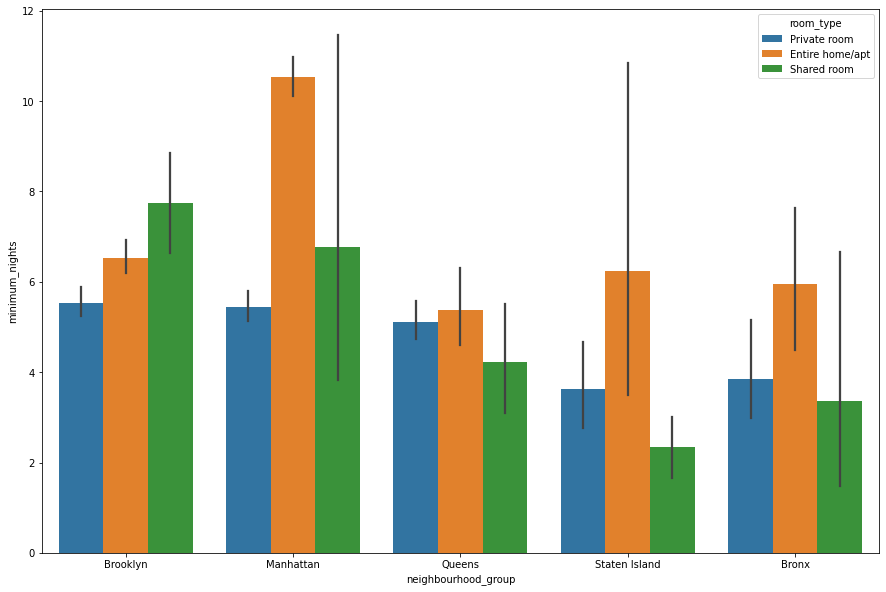

In [37]:
plt.figure(figsize=(15,10))
sns.barplot(data=data,x=data["neighbourhood_group"],y=data["minimum_nights"],hue=data["room_type"])
plt.show()

most people stayed more nights near manhattan neighbiurhoood


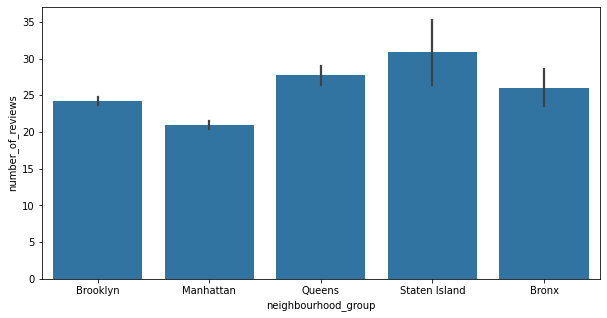

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x=data["neighbourhood_group"],y=data["number_of_reviews"])
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

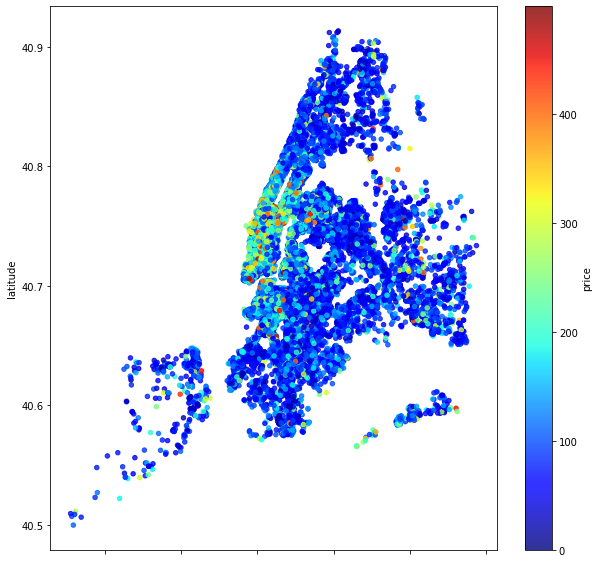

In [39]:
data[df].plot(kind="scatter",x="longitude",y="latitude",c="price",colorbar=True,alpha=0.8,figsize=(10,10),cmap=plt.get_cmap('jet'))

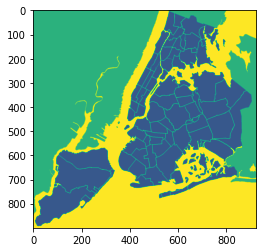

In [40]:
ny_img=plt.imread("NY.png")
plt.imshow(ny_img)
df5=data[df]

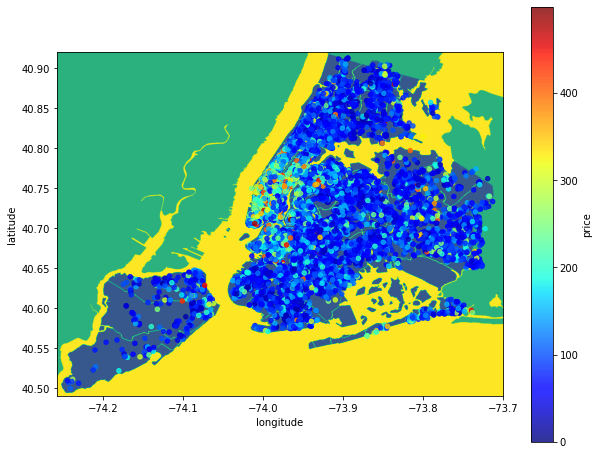

In [41]:
plt.figure(figsize=(10,8))
plt.imshow(ny_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
df5.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.8, zorder=5)
plt.show()

In [42]:
nun=data.loc[data["neighbourhood"].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
nun.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
6,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.400000,1,0
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.470000,1,220
8,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.990000,1,0


<Figure size 720x1080 with 0 Axes>

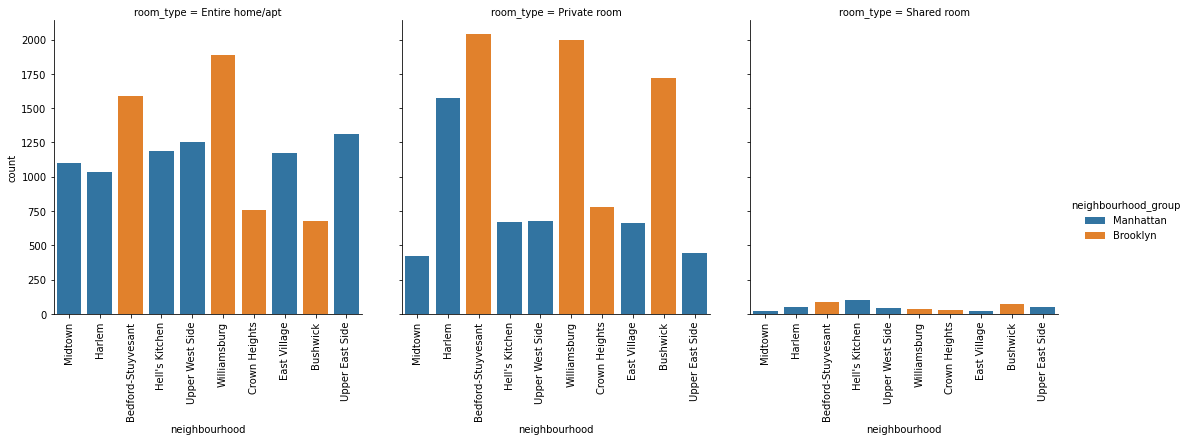

In [43]:
plt.figure(figsize=(10,15))
graph=sns.catplot(data=nun,x="neighbourhood",hue="neighbourhood_group",kind="count",col="room_type")
graph.set_xticklabels(rotation=90)
plt.show()

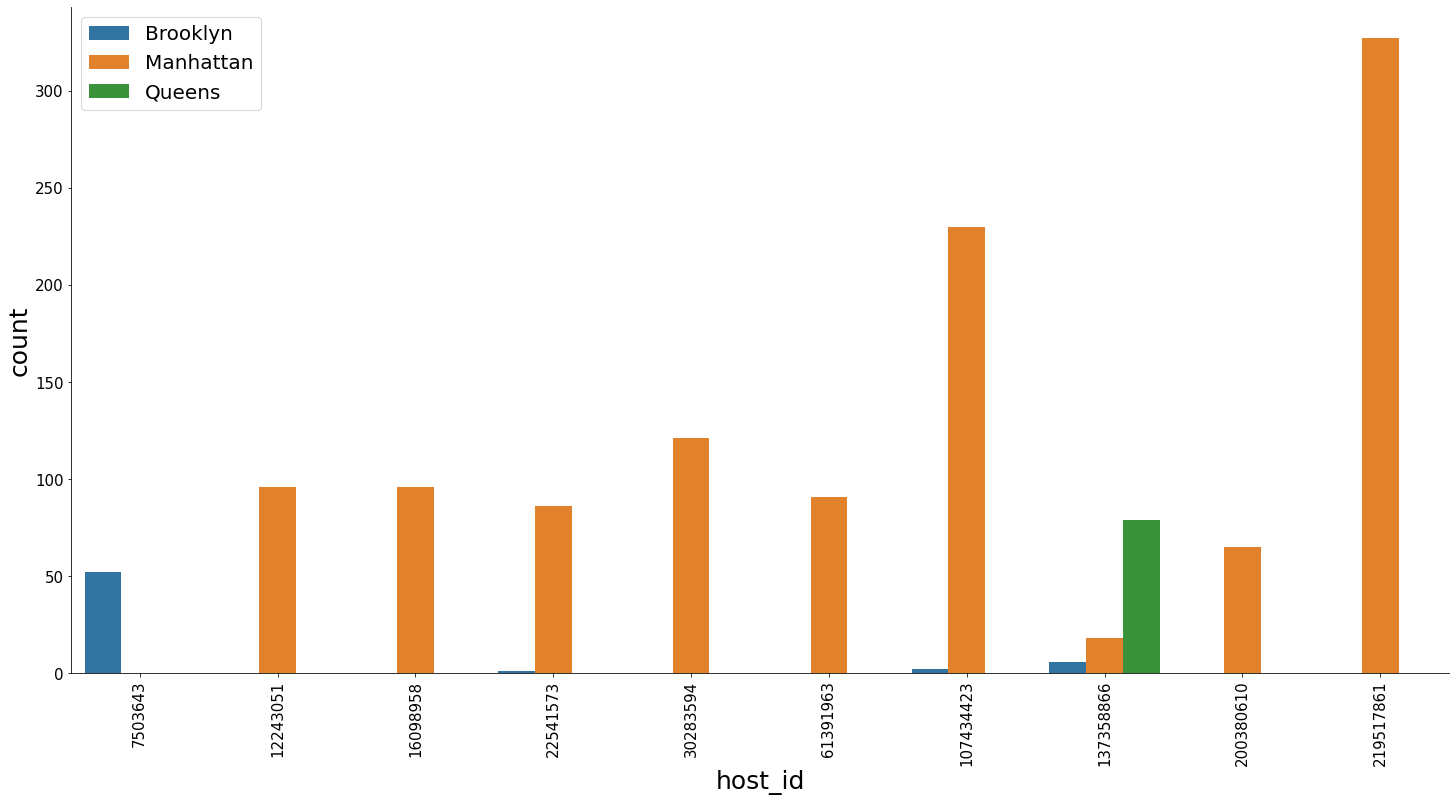

In [92]:
list_data=data.loc[data["host_id"].isin([219517861,107434423,30283594,137358866,16098958,12243051,61391963,22541573,200380610,7503643])]
sns.catplot(data=list_data,kind="count",x="host_id",hue="neighbourhood_group",height=10,aspect=2,legend_out=False)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
plt.xlabel("host_id",size=25)
plt.ylabel("count",size=25)
plt.show()